In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

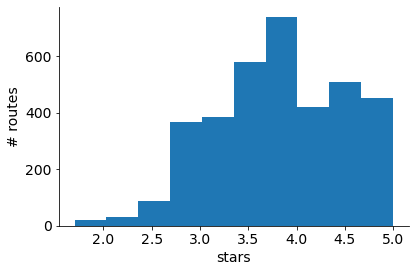

In [15]:
plt.rc('font', size=14)  
rf = pd.read_csv('./data/route_data.csv')
ax = rf['stars'].hist()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.set_xlabel('stars')
ax.set_ylabel('# routes')
plt.tight_layout()
plt.savefig('analyze/route_star_freq.png')

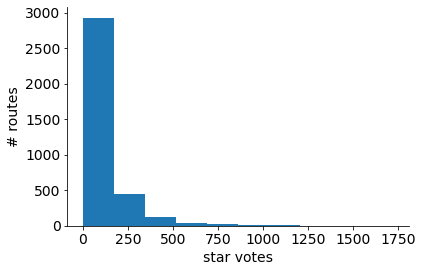

In [14]:
plt.rc('font', size=14)  
ax = rf['starVotes'].hist()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)
ax.set_xlabel('star votes')
ax.set_ylabel('# routes')
plt.tight_layout()
plt.savefig('analyze/route_star_vote_freq.png')

In [17]:
rf.columns

Index(['id', 'location', 'latitude', 'longitude', 'name', 'pitches', 'rating',
       'starVotes', 'stars', 'type'],
      dtype='object')

In [24]:
raw_types = rf['type'].unique()
raw_rating = rf['rating'].unique()
raw_pitches = rf['pitches'].unique()

In [91]:
rf['pitches'][rf['pitches'].isna()] = 1

In [92]:
rf['pitches'].unique()


array([ 1.,  6.,  8.,  3., 10.,  4.,  2.,  5.,  9.,  7., 11., 13., 12.,
       14., 15., 31., 20., 23., 16., 19., 24.])

In [123]:
raw_rating

array(['5.10a', '5.4', '5.7+', '5.9+', '5.9', '5.8', '5.8+', '5.6 R',
       '5.7', '5.11b', '5.9-', '5.5', '5.6', '5.10b/c R', '5.9+ R',
       '5.10c', '5.11a', '5.11c', '5.9- R', '5.8 R', '5.5 R', '5.3 R',
       '5.10b', '5.0', '5.2', '5.11b/c', '5.10-', '5.10d', '5.10b/c',
       '5.11d', '5.12a', '5.3', '5.4 R', '5.4 Easy Snow', '5.10d R',
       '5.2 R', '5.1', '5.12b', '5.11a/b', '5.10c PG13', '5.9 PG13',
       '5.10', '5.11a R', '4th', '5.11+', '5.8+ R', '5.10a/b', '5.10c/d',
       '5.11-', '5.11c PG13', '5.7 PG13', '5.5 PG13', '5.10a/b PG13',
       '5.12-', '5.10- PG13', '5.11d PG13', '5.8 PG13', '5.12d',
       '5.11c/d', '5.11', '5.12c', '5.13a', '5.12a/b PG13', '5.12b/c',
       '5.10+', '5.13a/b', '5.13b', '5.11- R', '5.10c R', 'V7',
       '5.9- PG13', '5.11a X', '5.12a/b', '5.12c/d', '5.11b R',
       '5.11a PG13', '5.7 R', '5.10+ PG13', '5.10a X', '5.10a R', '5.12',
       '5.12a X', '5.11b A1', '5.7 C0', '5.11b PG13', 'V4+', '5.10d PG13',
       '5.12b/c R', 'WI3-4

In [98]:
rating_frame = pd.DataFrame(columns=['raw_rating','s5'], 
    data=np.array([
        list(raw_rating),
        [r.split('5.') for r in raw_rating.astype(str)]
    ]).T)

In [185]:
climb_numerical_ratings = [ "".join(itertools.takewhile(str.isdigit, r)) for r in
    rating_frame[rating_frame['s5'].apply(lambda r: len(r) == 2 )]['s5'].str[-1] ]
rating_frame['climb_rating'] = np.nan
new_ratings = rating_frame[rating_frame['s5'].apply(lambda r: len(r) == 2 )].assign(climb_rating=climb_numerical_ratings)
rating_frame[rating_frame['s5'].apply(lambda r: len(r) == 2 )] = new_ratings

In [186]:
boulder_ratings = rating_frame[rating_frame['climb_rating'].isna()]['s5'].str[0].str.split('V')
boulder_ratings_strp = [  "".join(itertools.takewhile(str.isdigit, r)) for r in 
    boulder_ratings[boulder_ratings.apply(lambda r: len(r) == 2)].str[-1]]

In [187]:
bri = [int(brs) if brs != '' else 0 for brs in boulder_ratings_strp]

In [188]:
brf = rating_frame[rating_frame['s5'].str[0].str.split('V').apply(lambda r: len(r) == 2)].assign(climb_rating=bri)
rating_frame[rating_frame['s5'].str[0].str.split('V').apply(lambda r: len(r) == 2)] = brf


In [189]:
import re

In [190]:
res = [ re.search(r'\d+', r) for r in list(rating_frame[rating_frame['climb_rating'].isna()]['raw_rating'].astype(str)) ]

In [191]:
out = []
for r in res:
    if r is None:
        out.append(0)
    else:
        out.append(int(r.group(0)))
out

[4, 3, 5, 0, 5, 3, 4, 4, 4, 13, 3, 2, 5, 4, 2, 3, 5, 4, 0, 4, 6, 5, 5, 4]

In [192]:
remainder = rating_frame[rating_frame['climb_rating'].isna()].assign(climb_rating=out)
rating_frame[rating_frame['climb_rating'].isna()] = remainder

In [194]:
rating_frame['climb_rating'] = rating_frame['climb_rating'].astype(int)

In [201]:
rtf = rating_frame.set_index('raw_rating')
rf['clean_rating'] = rf['rating'].apply(lambda r: rtf.loc[r]['climb_rating'])

In [203]:
rf.head()

,id,location,latitude,longitude,name,pitches,rating,starVotes,stars,type,clean_pitches,clean_rating
0,105717502,"['Utah', 'Moab Area', 'Potash Road', 'Wall Str...",38.5477,-109.5988,Nervous in Suburbia,1.0,5.10a,510,4.0,Sport,1.0,10
1,105732407,"['Nevada', 'Southern Nevada', 'Red Rock', '16-...",36.0352,-115.4665,Sour Mash,6.0,5.10a,441,4.6,Trad,6.0,10
2,105748047,"['Colorado', 'Boulder', 'Flatirons', 'North', ...",39.9878,-105.2918,East Face (Standard),8.0,5.4,856,4.6,Trad,8.0,4
3,105748142,"['Colorado', 'Boulder', 'Boulder Canyon', 'Cob...",40.1687,-105.3730,Empor,3.0,5.7+,371,4.0,Trad,3.0,7
4,105748214,"['Colorado', 'Boulder', 'Boulder Canyon', 'The...",40.0034,-105.3959,New Lease on Life,1.0,5.9+,178,2.7,Sport,1.0,9


In [204]:
raw_types

array(['Sport', 'Trad', 'Trad, TR', 'Sport, TR', 'TR', 'Trad, Sport',
       'Trad, Snow, Alpine', 'Trad, Sport, TR', 'Trad, Alpine', 'Boulder',
       'Sport, Aid', 'Trad, Sport, Aid', 'Trad, TR, Ice',
       'Trad, Mixed, Ice', 'Trad, Aid', 'Snow, Alpine', 'Boulder, Alpine',
       'TR, Boulder, Alpine', 'Trad, Ice', 'Ice', 'TR, Ice',
       'Sport, Alpine', 'Aid', 'Snow', 'Alpine', 'Trad, TR, Aid',
       'Trad, TR, Boulder', 'Sport, Mixed, Ice', 'Sport, Mixed',
       'Trad, Mixed, Ice, Snow, Alpine', 'Trad, Aid, Alpine'],
      dtype=object)

In [214]:
unique_types = np.unique(list(itertools.chain.from_iterable([r.split(', ') for r in raw_types])))
pd.DataFrame(
    data=np.array(
        unique_types,
        np.zeros(len(unique_types))
    ).T
    columns=['']
)

array(['Aid', 'Alpine', 'Boulder', 'Ice', 'Mixed', 'Snow', 'Sport', 'TR',
       'Trad'], dtype='<U7')

In [38]:
len(rf[rf['pitches'].isnaz()])/len(rf)

0.18857938718662953

In [54]:
rf['clean_pitches'] = rf['pitches']
rf['clean_pitches'][rf['clean_pitches'].isna()] = 1

array([ 1.,  6.,  8.,  3., 10.,  4.,  2.,  5.,  9.,  7., 11., 13., 12.,
       14., 15., 31., 20., 23., 16., 19., 24.])

In [63]:
import itertools
"".join(itertools.takewhile(str.isdigit, "10pizzas"))

'10'

In [78]:
climb_digit_ratings = ["".join(itertools.takewhile(str.isdigit, val))
   for val in rating_frame[rating_frame['s5'].apply(lambda x: len(x)) == 2]['s5'].str[-1] ]

In [86]:
rating_frame

,raw_rating,s5,digit_rating
0,5.10a,"[, 10a]",0
1,5.4,"[, 4]",0
2,5.7+,"[, 7+]",0
3,5.9+,"[, 9+]",0
4,5.9,"[, 9]",0
5,5.8,"[, 8]",0
6,5.8+,"[, 8+]",0
7,5.6 R,"[, 6 R]",0
8,5.7,"[, 7]",0
9,5.11b,"[, 11b]",0
